## Decision Trees
### Topics
* Introduction to Decision Trees
* The Decision Tree Algorithms
* Attribute selection measures
* Decision Tree Classification
* Decision Tree Regression
* Advantages & Limitations of Decision Trees

### 1. Introduction to Decision Trees

* Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. 
* It can be utilized for both classification and regression kind of problem.
* Non-parametric supervised learning method for regression & classification
* It's similar to answering a series of yes/no questions.
* A good algorithm will have less & right questions compared to not-so-good one, like a good doctor
* The nodes are questions & leafs are prediction



### The tree structure

* internal node represents feature(or attribute)
* the branch represents a decision rule
* each leaf node represents the outcome
* recursive partitioning
* explainable decision making
* non-parametric method
* handle high dimensional data with good accuracy

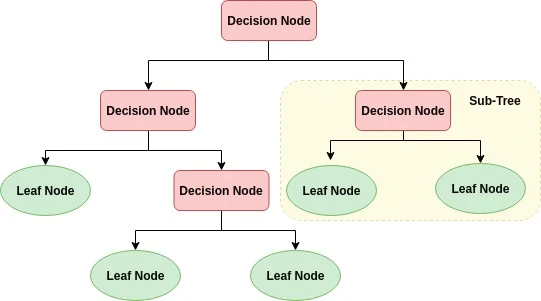

### Recursively build decision tree

* The root node feature is selected based on the results from the Attribute Selection Measure(ASM).
* Which attribute to choose so that partitions have the biggest drop in randomness.
* The ASM is repeated until there is a leaf node or a terminal node where it cannot be split into sub-nodes.

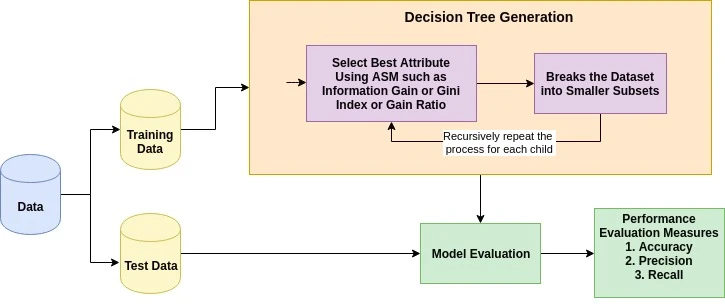

### Attribute selection measure (ASM)

* A scientific way to partition data into the best possible manner
* Rank each feature to select the best splitting attribute (How to define "the best"?)
* The data mining process for data reduction
* The data reduction is necessary to make better analysis and prediction of the target variable.

#### Three selection measures

* Information Gain
* Gain Ratio
* Gini Index

### Information Gain - ID3 (Iterative Dichotomiser) Algorithm

<b>Concept: Entropy</b>

    Entropy is a measure of the randomness (uncertainty) in the information being processed. 
    The higher the entropy, the harder it is to draw any conclusions from that information.

<b>Shannon entropy</b> formula for an event X with n possible outcomes and probabilities:

\begin{aligned} \mathrm {H} (X)=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log \mathrm {P} (x_{i})}\end{aligned}

Example: a fair coin with p=1/2 for head and  p=1/2 for tail

\begin{aligned}\mathrm {H} (X)&=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{b}\mathrm {P} (x_{i})}\\&=-\sum _{i=1}^{2}{{\frac {1}{2}}\log _{2}{\frac {1}{2}}}\\&=-\sum _{i=1}^{2}{{\frac {1}{2}}\cdot (-1)}=1\end{aligned}

Example: a defective coin with p=0.7 for head and 0.3 for tail

\begin{aligned}\mathrm {H} (X)&=-p\log _{2}(p)-q\log _{2}(q)\\&=-0.7\log _{2}(0.7)-0.3\log _{2}(0.3)\\&\approx -0.7\cdot (-0.515)-0.3\cdot (-1.737)\\&=0.8816<1\end{aligned}

Some interesting properties

* Uniform distributions have maximum uncertainty
    * hardest to make any conclusion because every possibility has equal chance.
    * hardest to choose one food from a lot of equally delicious food.
    * The maximal entropy by Jensen inequality 
    $$\mathrm {H} (X)=\operatorname {E} \left[\log _{b}\left({\frac {1}{p(X)}}\right)\right]\leq \log _{b}\left(\operatorname {E} \left[{\frac {1}{p(X)}}\right]\right)=\log _{b}(n)$$
* Events with a certain outcome have zero uncertainty. 
    * A magic coin with two heads has no uncertainty. 
    * Based on some questions and answers, your doctor comes up with only one possible diagnosis, i.e., zero uncentainty.


* Information gain can be defined as the amount of information gained about a random variable or signal from observing another random variable.
* i.e., if you know the value of one variable, it will reduce the randomness, by how much?
* It can be considered as <b>the difference between the entropy of parent node and weighted average entropy of child nodes.</b>

\begin{alignedat}{2}IG(T,a)&=\mathrm {H} (T)-\sum _{v\in vals(a)}{P_{a}{(v)}\mathrm {H} \left(S_{a}{(v)}\right)}\\&=\mathrm {H} (T)-\mathbb {E} _{P_{a}}{\left[\mathrm {H} {(S_{a}{(v)})}\right]}\\&=\mathrm {H} (T)-\mathrm {H} {(T|a)}\\&=\overbrace {\mathrm {H} (T)} ^{\text{Entropy (parent)}}-\overbrace {\mathrm {H} (T|a)} ^{\text{Weighted Sum of Entropy (Children)}}\end{alignedat}

where $a$ is the $a^{\text{th}}$ feature to partition data

$T$ denotes a set of training examples, each of the form $ ({\textbf {x}},y)=(x_{1},x_{2},x_{3},...,x_{k},y)$ where $ x_{a}\in vals(a)$  is the value of the $ a^{\text{th}}$ attribute or feature of example ${\textbf {x}}$ and $y$ is the corresponding class label.

$ S_{a}{(v)}=\{{\textbf {x}}\in T|x_{a}=v\}$ is the set of training inputs of $T$ for which attribute $a$ is equal to $v$

$ P_{a}{(v)}:={\frac {|S_{a}{(v)}|}{|T|}}$ is the categorical probability distribution $ P_{a}{(v)}$ on the values $ v\in vals(a)$ of attribute $a$

<b>The attribute $a$ with the highest information gain, $IG(T, a)$, is chosen as the splitting attribute</b>

* ID3 works when feature data & target data both are categorical in nature

### Gain Ratio - C4.5 algorithm

* Information gain is biased for the attribute with many outcomes. 
* It means it prefers the attribute with a large number of distinct values
* Information gain ratio biases the decision tree against considering attributes with a large number of distinct values

<b>Intrinsic value calculation</b>

\begin{aligned} IV(T,a)&=-\sum _{v\in values(a)}{\frac {|\{x\in T|value(x,a)=v\}|}{|T|}}\cdot \log _{2}\left({\frac {|\{x\in T|value(x,a)=v\}|}{|T|}}\right)
\\&=-\sum _{v\in values(a)}P_{a}{(v)}\cdot \log _{2}\left(P_{a}{(v)}\right)\end{aligned}

The <b>information gain ratio</b> is just the ratio between the information gain and the intrinsic value: 

\begin{aligned}IGR(T,a)=IG/IV\end{aligned}

<b>The attribute $a$ with the highest gain ratio is chosen as the splitting attribute</b>

### Gini impurity and index - CART (Classification and Regression Tree)

* Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
* It reaches its minimum (zero) when all cases in the node fall into a single target category.
* To compute Gini impurity for a set of items with $N$ classes, suppose $ i\in \{1,2,...,N\}$, and let $ p_{i}$ be the fraction of items labeled with class $i$ in the set, i.e., $p_{i}$ is the probability that a tuple $x$ in ${\textbf {x}}$ belongs to class $i$

$$ \operatorname {G}(T)=\sum _{i=1}^{N}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{N}p_{i}(1-p_{i})=\sum _{i=1}^{N}(p_{i}-{p_{i}}^{2})=\sum _{i=1}^{N}p_{i}-\sum _{i=1}^{N}{p_{i}}^{2}=1-\sum _{i=1}^{N}{p_{i}}^{2}$$

How to compute Gini Index

* binary split for each attribute
* compute a weighted sum of the impurity of each partition
* If a binary split on attribute $a$ partitions data $T$ into $T_{1}$ and $T_{2}$, the Gini index of $T$ is:

$$ \operatorname {G}(T, a)={\frac {|T_{1}|}{|T|}}{G}(T_{1}) + {\frac {|T_{2}|}{|T|}}{G}(T_{2}) $$

* In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute
* <b>The attribute $a$ with minimum Gini index is chosen as the splitting attribute.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* download tennis.csv file at https://tinyurl.com/3j2oxjv3

In [2]:
play_data = pd.read_csv('tennis.csv') 

In [3]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


* A decision tree for above data where 
    * an internal node represents feature(or attribute)
    * the branch represents a decision rule
    * each leaf node represents the outcome 
    * the topmost node in a decision tree is known as the root node

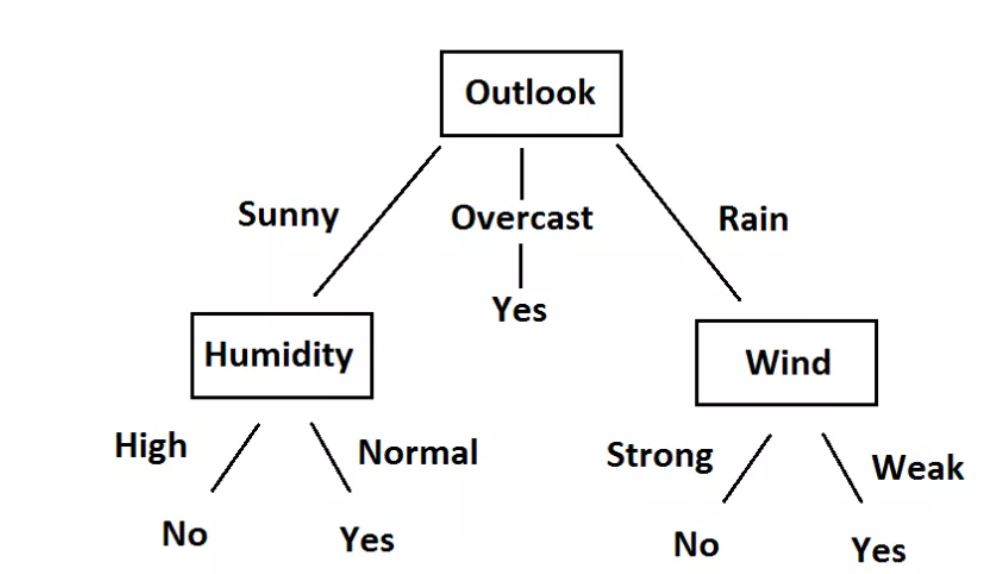

* C4.5 is an advancement of ID3, it coverts continues features into categorical features. Then, proceeds with ID3
* CART is based on C4.5, with slight advancement of 'target can be continues'.
* scikit-learn decision trees are based on CART

#### Criterion of creating Decision Tree
* Entropy - Objective is to maximize information gain in each split
* Gini Impurity - If classes are mixed, gini impurity is maximul
##### Both the approaches, yields almost same results. We will discuss algorithm using Entropy


### Entropy of play
 $$H(play) =  – P_{Yes} \cdot \log _{2}\left(P_{Yes}\right) – P_{No} \cdot \log _{2}\left(P_{No}\right)$$

In [4]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [5]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)

In [6]:
Entropy_Play

0.9402859586706311

### Information Gain
* The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
* Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
* $IG(T,a)=\mathrm {H} (T)-\sum _{v\in vals(a)}{P_{a}{(v)}\mathrm {H} \left(S_{a}{(v)}\right)}$
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

#### Information Gain on splitting by Outlook
\begin{aligned} IG(Play, Outlook) = H(Play) – ∑ [ p(Play|Outlook)\cdot H(Play|Outlook) ] \end{aligned}

\begin{aligned} IG(Play, Outlook) =  H(Play) &– [ p(Play|Outlook=Sunny) \cdot H(Play|Outlook=Sunny) ] 
                        \\&– [ p(Play|Outlook=Overcast) \cdot H(Play|Outlook=Overcast) ]  
                        \\&– [ p(Play|Outlook=Rain) \cdot H(Play|Outlook=Rain) ] \end{aligned}

In [7]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [8]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [9]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

In [10]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [11]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0

In [12]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [13]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

In [14]:
Entropy_Play_Outlook_Rain

0.9709505944546686

#### Gain on splitting by attribute outlook

In [15]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*0 - (5/14) * Entropy_Play_Outlook_Rain 

0.24674981977443933

#### Other gains
* IG(Play, Temperature) - 0.029
* IG(Play, Humidity) - 0.151
* IG(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
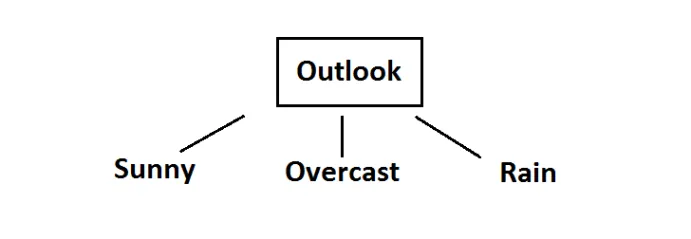

### Time to find the next splitting criteria

In [16]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [17]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [18]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [19]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

### Information Gain for humidity

In [20]:
#Entropy for attribute high = 0, also entropy for attribute normal = 0 
Entropy_Play_Outlook_Sunny - (3/5)*0 - (2/5)*0

0.9709505944546686

### Information Gain for windy
* False -> 3 -> [1+ 2-]
* True -> 2 -> [1+ 1-]

In [21]:
Entropy_Wind_False = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [22]:
Entropy_Wind_False

0.9182958340544896

In [23]:
Entropy_Play_Outlook_Sunny - (3/5)* Entropy_Wind_False  - (2/5)*1 

0.01997309402197489

### Information Gain for temperature
* hot -> 2 -> [2- 0+]
* mild -> 2 -> [1+ 1-]
* cool -> 1  -> [1+ 0-]

In [24]:
Entropy_Play_Outlook_Sunny - (2/5)*0 - (1/5)*0 - (2/5)* 1

0.5709505944546686

#### Conclusion : Humidity is the best choice on sunny branch
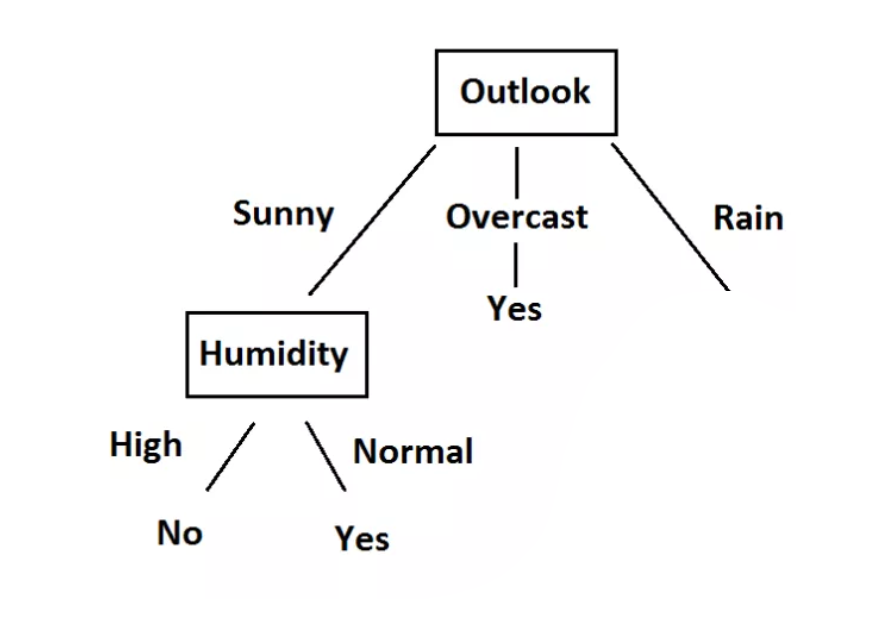


In [25]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [26]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Splitting the rainy branch

In [27]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [28]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [29]:
Entropy_Play_Outlook_Rainy

0.9709505944546686

### Information Gain for temp
* mild -> 3 [2+ 1-]
* cool -> 2 [1+ 1-]

In [30]:
Entropy_Play_Outlook_Rainy - (3/5)*0.918 - (2/5)*1

0.020150594454668602

### Information Gain for Windy

In [31]:
Entropy_Play_Outlook_Rainy - (2/5)*0 - (3/5)*0

0.9709505944546686

### Information Gain for Humidity
* High -> 2 -> [1+ 1-]
* Normal -> 3 -> [2+ 1-]

In [32]:
Entropy_Play_Outlook_Rainy_Normal = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [33]:
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

In [34]:
Entropy_Play_Outlook_Rainy - (2/5)*1 - (3/5)*Entropy_Play_Outlook_Rainy_Normal

0.01997309402197489

### Final Tree

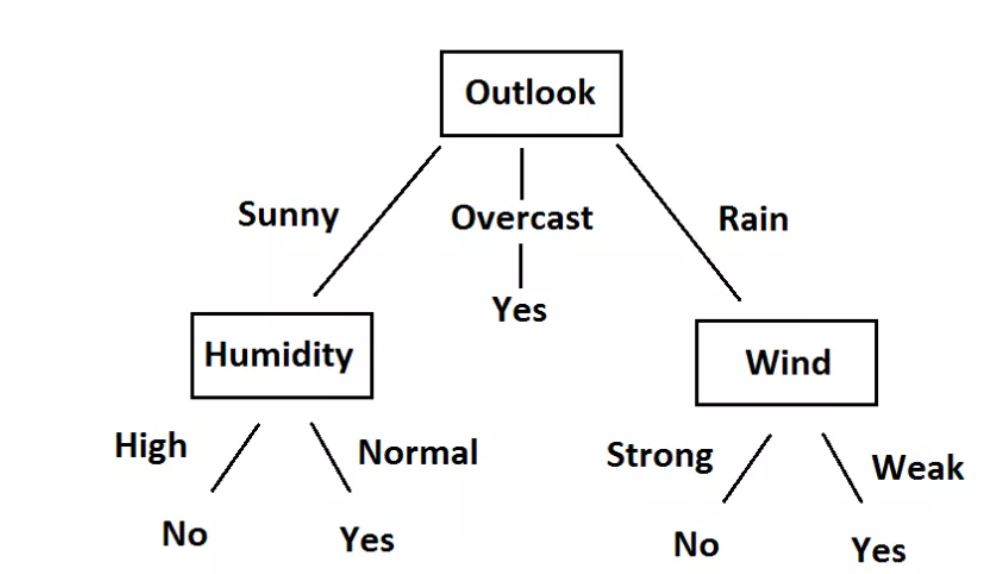


### However scikit-learn use binary trees to build the decision tree

* A two-way split followed by another two-way split on one of the children is not the same thing as a single three-way split. 
* This is mainly a technical issue: if you don't restrict to binary choices, there are simply too many possibilities for the next split in the tree.
* For practical reasons (combinatorial explosion) most libraries implement decision trees with binary splits.

### Decision Tree for Classification
* The leaf nodes of decision tree decides the class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

### Visualize decision tree

* Install graphviz on your machine https://graphviz.org/download/
* Add the graphviz /bin directory to your PATH
* In your conda environment, pip install graphviz

In [35]:
pd.read_csv('tennis.csv') 

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [136]:
dataset.iloc[:,2:-1]

,humidity,windy
0,high,False
1,high,True
2,high,False
3,high,False
4,normal,False
5,normal,True
6,normal,True
7,high,False
8,normal,False
9,normal,False


[[0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]]
   outlook_overcast  outlook_rainy  outlook_sunny  temp_cool  temp_hot  \
0               0.0            0.0            1.0        0.0       1.0   
1               0.0            0.0            1.0        0.0       1.0   
2               1.0            0.0            0.0        0.0       1.0   
3               0.0            1.0            0.0        0.0       0.0   
4               0.0            1.0            0.0        1.0       0.0   

   temp_mild  humidity_high  humidity_normal  windy_False  windy_True  
0        0.0        

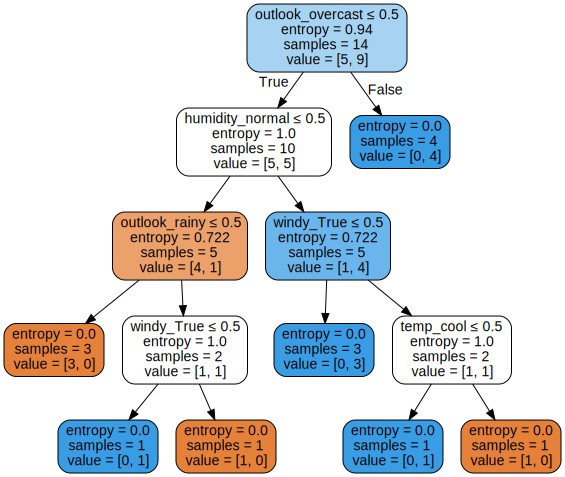

In [36]:
#Import the DecisionTreeClassifier  
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
  
#Import the dataset   
dataset = pd.read_csv('tennis.csv')  
  
train_features = dataset.iloc[:,:-1]  
train_targets = dataset.iloc[:,-1]  

# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(train_features)
X_train_ohe = ohe.transform(train_features).toarray()
print(X_train_ohe)

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(train_features.columns))
print(ohe_df.head())
  
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train_ohe,train_targets)  

import graphviz

graphviz.Source(export_graphviz(tree, out_file=None, filled=True, rounded=True, 
                                special_characters=True, 
                                feature_names=ohe.get_feature_names(train_features.columns)))

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier

In [38]:
iris = load_iris()

In [39]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [42]:
dt = DecisionTreeClassifier(criterion='entropy')

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
trainX,testX,trainY,testY = train_test_split(iris.data, iris.target, random_state=1)

In [45]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(criterion='entropy')

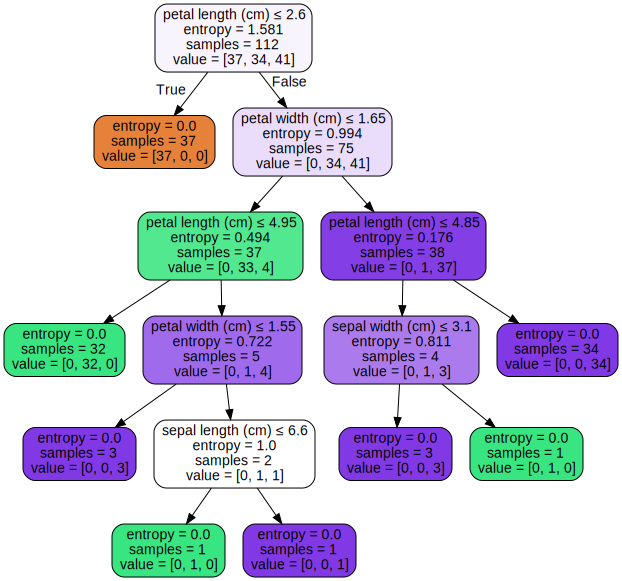

In [46]:
import graphviz

graphviz.Source(export_graphviz(dt, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=iris.feature_names))

### Another way to visualize the tree

In [47]:
export_graphviz(dt, "dt.tree", feature_names=iris.feature_names)
print(open("dt.tree").read())

digraph Tree {
node [shape=box] ;
0 [label="petal length (cm) <= 2.6\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]"] ;
1 [label="entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.65\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\nentropy = 0.494\nsamples = 37\nvalue = [0, 33, 4]"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]"] ;
3 -> 4 ;
5 [label="petal width (cm) <= 1.55\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]"] ;
3 -> 5 ;
6 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
5 -> 6 ;
7 [label="sepal length (cm) <= 6.6\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]"] ;
5 -> 7 ;
8 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]"] ;
7 -> 8 ;
9 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
7 -> 9 ;
10 [label="petal length 

* Copy/paste the tree content to

* http://www.webgraphviz.com/

* Criteria - Entropy

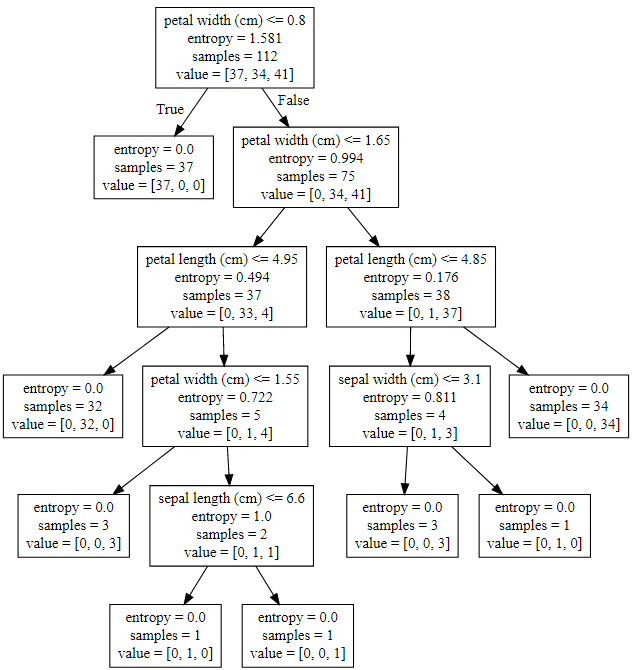

In [48]:
dt.predict(testX)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

#### Feature Importances
* We can use this techniques to identify important features
* The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance
* https://sefiks.com/2020/04/06/feature-importance-in-decision-trees/

In [49]:
list(zip(iris.feature_names, dt.feature_importances_))

[('sepal length (cm)', 0.011296843267512626),
 ('sepal width (cm)', 0.01832976363675285),
 ('petal length (cm)', 0.6812790746210281),
 ('petal width (cm)', 0.28909431847470635)]

#### Visualizing Decision Boundry

In [50]:
from sklearn.datasets import make_blobs

In [51]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

In [52]:
X

array([[ 9.25784958, -2.82526517],
       [ 0.96889603, -1.63014501],
       [-8.2630645 ,  0.90588073],
       ...,
       [ 5.51767708, -9.88164118],
       [ 6.60297118, -9.4394812 ],
       [ 7.38216345, -9.34058898]])

In [53]:
Y

array([0, 3, 2, 2, 2, 0, 0, 1, 1, 1, 3, 0, 1, 2, 0, 2, 1, 3, 2, 0, 1, 3,
       2, 0, 2, 3, 2, 0, 1, 1, 2, 3, 2, 1, 0, 1, 2, 1, 2, 2, 3, 2, 3, 3,
       0, 0, 1, 2, 1, 2, 0, 2, 0, 3, 2, 0, 1, 2, 1, 2, 3, 3, 3, 1, 1, 3,
       0, 1, 2, 3, 1, 2, 2, 3, 3, 1, 2, 0, 0, 2, 3, 0, 2, 2, 0, 3, 0, 2,
       3, 3, 0, 2, 0, 2, 3, 3, 2, 2, 2, 1, 2, 1, 2, 0, 2, 3, 0, 2, 0, 3,
       0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 3, 3, 1, 0, 2, 2, 0,
       3, 3, 3, 2, 0, 2, 0, 3, 2, 1, 1, 2, 3, 2, 0, 3, 0, 3, 3, 0, 3, 2,
       3, 2, 3, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 2, 3, 0, 0, 3, 2, 0, 2,
       1, 1, 1, 1, 2, 1, 3, 3, 1, 2, 3, 0, 0, 3, 1, 2, 1, 1, 2, 0, 3, 0,
       1, 1, 2, 1, 1, 0, 0, 3, 3, 0, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2,
       0, 0, 3, 2, 3, 3, 2, 1, 0, 0, 2, 3, 1, 1, 1, 1, 0, 2, 1, 3, 2, 3,
       3, 0, 1, 2, 0, 1, 3, 2, 1, 0, 3, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 2, 3, 2, 0, 1, 1, 3, 1, 1, 3, 3, 2, 2, 1, 1, 1, 2, 1, 3, 2, 0,
       2, 1, 1, 3, 3, 1, 3, 2, 0, 3, 3, 1, 1, 1, 0,

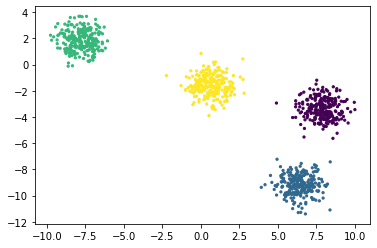

In [54]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt.fit(X,Y)

DecisionTreeClassifier()

In [57]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [58]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [59]:
xx.shape

(86, 109)

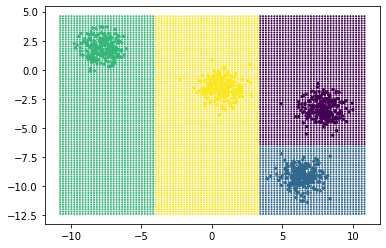

In [60]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

### 4. Decision Tree for Regression
* Continues target is predicted with Tree.
* ID3 is modified for regression by replacing Information Gain with Mean Squared Error.
* Decision Tree tries to partition data into subsets of homogenous contents ( minimize mean squared error )

* tennis-time.csv is at https://tinyurl.com/1mbwi294

In [61]:
play_time = pd.read_csv('tennis-time.csv')

In [62]:
play_time

,outlook,temp,humidity,windy,time
0,sunny,hot,high,False,26
1,sunny,hot,high,True,30
2,overcast,hot,high,False,48
3,rainy,mild,high,False,46
4,rainy,cool,normal,False,62
5,rainy,cool,normal,True,23
6,overcast,cool,normal,True,43
7,sunny,mild,high,False,36
8,sunny,cool,normal,False,38
9,rainy,mild,normal,False,48


In [63]:
play_time.outlook

0        sunny
1        sunny
2     overcast
3        rainy
4        rainy
5        rainy
6     overcast
7        sunny
8        sunny
9        rainy
10       sunny
11    overcast
12    overcast
13       rainy
Name: outlook, dtype: object

In [64]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit(play_time.outlook).classes_

array(['overcast', 'rainy', 'sunny'], dtype=object)

In [65]:
LabelEncoder().fit_transform(play_time.outlook)

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [66]:
for col in ['outlook','temp','humidity','windy']:
    le = LabelEncoder()
    play_time[col] = le.fit_transform(play_time[col])

In [67]:
play_time

,outlook,temp,humidity,windy,time
0,2,1,0,0,26
1,2,1,0,1,30
2,0,1,0,0,48
3,1,2,0,0,46
4,1,0,1,0,62
5,1,0,1,1,23
6,0,0,1,1,43
7,2,2,0,0,36
8,2,0,1,0,38
9,1,2,1,0,48


In [68]:
LabelEncoder().fit_transform(['a','b','a','c','b'])

array([0, 1, 0, 2, 1], dtype=int64)

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dt = DecisionTreeRegressor()

In [71]:
dt.fit(play_time.drop('time',axis=1), play_time.time)

DecisionTreeRegressor()

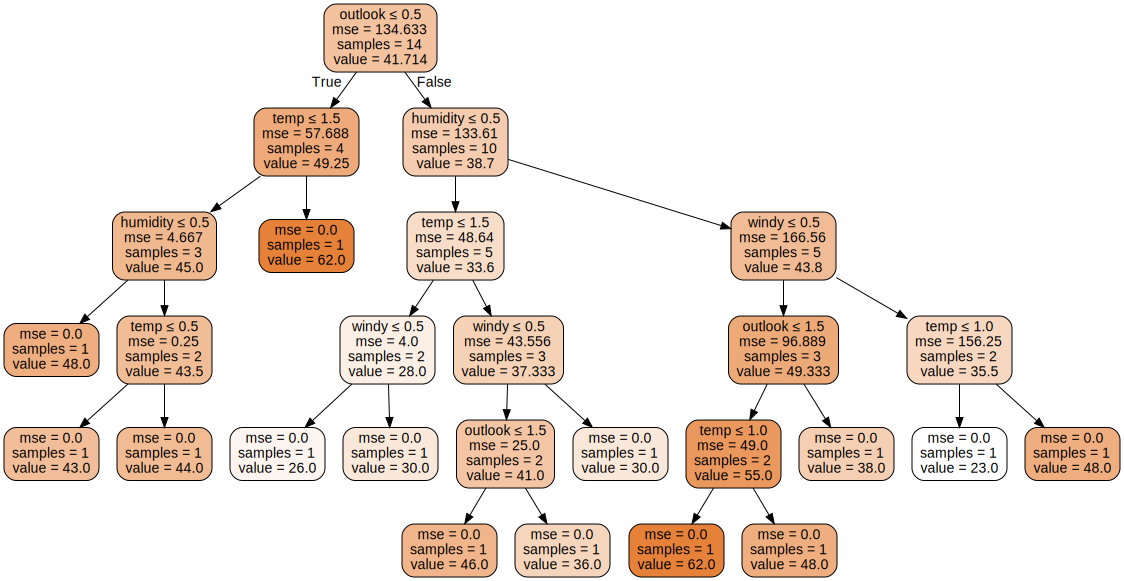

In [72]:
graphviz.Source(export_graphviz(dt, 
                                out_file=None, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                feature_names=['outlook','temp','humidity','windy']))

In [73]:
45*3/4+62*1/4

49.25

In [74]:
play_time

,outlook,temp,humidity,windy,time
0,2,1,0,0,26
1,2,1,0,1,30
2,0,1,0,0,48
3,1,2,0,0,46
4,1,0,1,0,62
5,1,0,1,1,23
6,0,0,1,1,43
7,2,2,0,0,36
8,2,0,1,0,38
9,1,2,1,0,48


In [75]:
dt.predict([[2,1,1,1]])

array([23.])

In [76]:
dt.feature_importances_

array([0.29746223, 0.38850867, 0.14515689, 0.16887221])

### 5. Advantages of Decision Tree
* Highly Interpretable & can be visualized
* Minimal data preprocessing - missing data handling, normalizing, one-hot-encoding not required
* Handle both neumerical & categorical values
* Supports multi-output 

#### Understanding Multi-Output Problem
* Supervised learning problem with multiple outputs, target is 2D
* If there is no correlation between target, they can be independently calculated using N models ( in case of N targets )
* Since predictors are same, outputs are likely to be correlated.
* Like many other models, decision trees allows for multi-output targets

### 6. Limitations of Decision Tree
* Overfitting - height of tree kept growing with addition of more data
* Slight changes in data or order of data can change the tree
* Imbalanced classes datasets creates biased tree so data needs balancing

##### The above two limitations are handled by ensemble methods

#### Pruning
* A technique of machine learning which reduces height of the tree by chopping off parts of the tree that's not doing anything significant in prediction
* Two types of pruning - Prepruning & Postpruning
  - Prepruning : Don't allow tree to grow beyond this point
  - Postpruning : Allows tree to grow as much as possible, then prune the tree

* Pruning is not currently supported in scikit
* This can be achieved using min_samples_leaf & max_height

![](img/questions-01.png)

### References
https://en.wikipedia.org/wiki/Decision_tree_learning



https://towardsdatascience.com/entropy-is-a-measure-of-uncertainty-e2c000301c2c

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://medium.com/datadriveninvestor/decision-tree-algorithm-with-hands-on-example-e6c2afb40d38

https://towardsai.net/p/programming/decision-trees-explained-with-a-practical-example-fe47872d3b53

https://blog.paperspace.com/decision-trees/

## Support Vector Machines

<hr>

### Topics
1. Introduction to Support Vector Machines
2. Maximal Margin Classifier
3. Soft Margin Classifier
2. SVM Algorithm for Classification
3. SVM 
4. SVM for Regression
5. Hyper-parameters in SVM

<hr>

### 1. Introduction to Support Vector Machines
* Supervised Learning method used for Classification, Regression & Outlier Detection
* SVMs' are effective in high dimension spaces
* Uses subset of training data, so memory efficient
* Effective in higher dimensional data

### 2. Maximal Margin Classifier
* Objective is to find a line( or hyperplane ) which maximizes the separation between data of different classes
* The distance between the line and the closest data points is referred to as the margin.
* The best or optimal line or hyper-plane is that can separate the two classes is the line that as the largest margin.

Example: Use math and stats score to predict ML grade
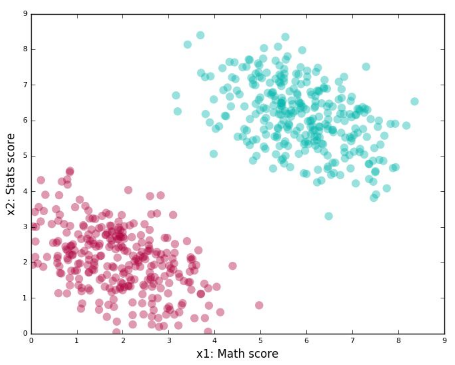

Which separating boundary is the best?

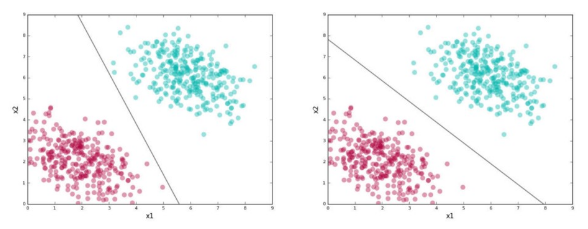

* Hyperplane is learnt from training data & objective is to maximize the margin

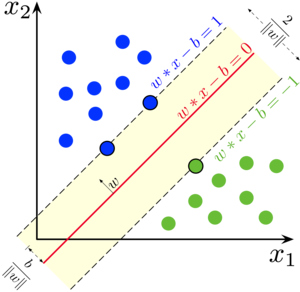

Training dataset of $n$ points of the form

$$ ({\vec {x}}_{1},y_{1}),\ldots ,({\vec {x}}_{n},y_{n})$$

where the $y_{i}$ are either 1 or −1, each indicating the class to which the point $ {\vec {x}}_{i}$ belongs. Each $ {\vec {x}}_{i}$ is a $p$-dimensional real vector. 

Any hyperplane can be written as the set of points $ {\vec {x}}$ satisfying

$$ {\vec {w}}\cdot {\vec {x}}-b=0$$

where $ {\vec {w}}$ is the (not necessarily normalized) normal vector to the hyperplane. 

The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations

$$ {\vec {w}}\cdot {\vec {x}}-b=1$$ (anything on or above this boundary is of one class, with label 1)
and

$$ {\vec {w}}\cdot {\vec {x}}-b=-1$$ (anything on or below this boundary is of the other class, with label −1).

This can be written as

$$ y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\geq 1,\quad {\text{ for all }}1\leq i\leq n.\qquad \qquad $$

We can put this together to get the optimization problem:

Minimize $ \|{\vec {w}}\|$ subject to $ y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\geq 1$ for $ i=1,\ldots ,n$.

The $ {\vec {w}}$ and $b$ that solve this problem determine our classifier, $ {\vec {x}}\mapsto \operatorname {sgn}({\vec {w}}\cdot {\vec {x}}-b)$

### 3. Soft Margin Classifier
* In real world, data is always messed up & there is no clear separation of boundries
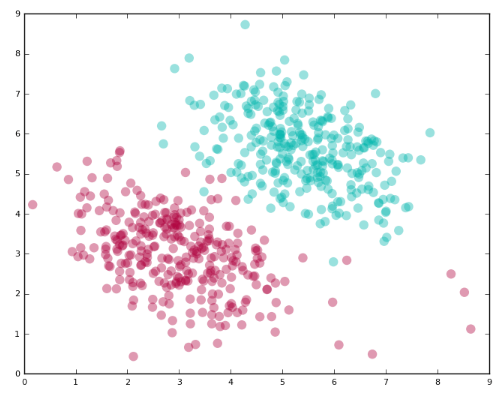

* With Soft Margin Classifier, few data points are allowed to be misclassified

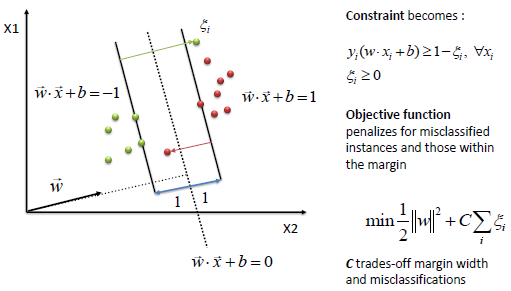

* The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
* For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
* A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
* In other words``C`` behaves as a regularization parameter in the SVM.

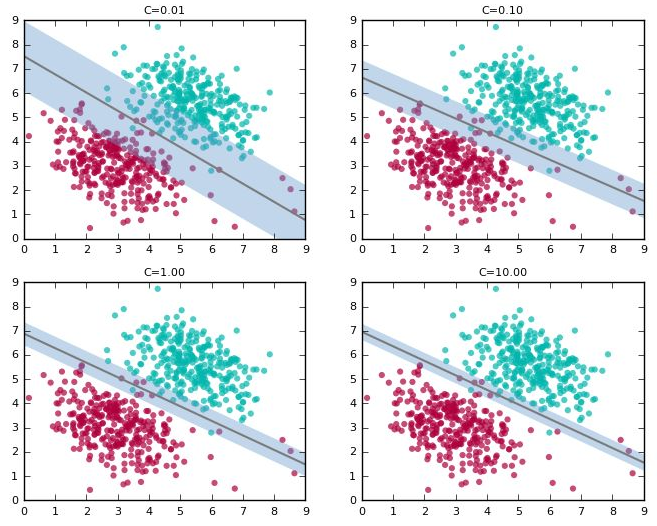

### 4. Support Vector Machine on higher dimension
* For data linearly separable, SVM works like above mentioned Soft Margin Classifier
* Data which is non-linearly separable 

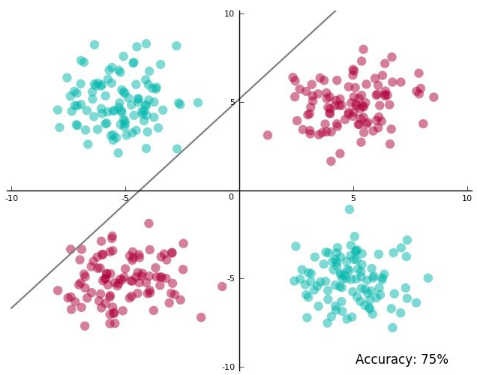

* SVM supports configurable kernel functions which has ability to transform data to higher dimension.
* Check if decision boundry exists now to separate the classes in higher dimension.
* Transform the decision boundry to original dimension

* Map the data into a 3D space

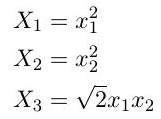

<img src="https://tinyurl.com/1oc5o3va" width="550" align="left">

<img src="https://tinyurl.com/10els1y8" width="750" align="left">

In [77]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [78]:
X, y = make_circles(n_samples=1000, noise=.05, factor=.5)

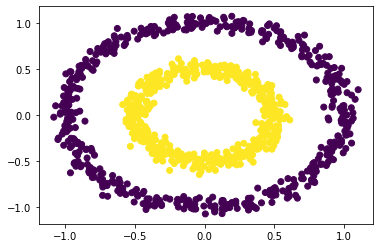

In [79]:
plt.scatter(X[:,0],X[:,1],c=y,)

### Doing transformation manually

In [80]:
col = np.sum(np.square(X),axis=1)

In [81]:
col

array([1.03688708, 0.22528543, 1.13168485, 0.21612209, 1.07920798,
       0.33269024, 1.04000302, 0.32339295, 0.27322917, 1.12026326,
       0.19022634, 1.19741034, 0.23614571, 0.24652815, 1.12166703,
       1.05390915, 1.02045233, 0.90620099, 1.03882714, 1.05343431,
       1.05900923, 1.00503006, 0.31225596, 0.1751761 , 0.29849237,
       0.92916287, 0.22568428, 0.25630761, 0.90367009, 0.32072321,
       1.15174677, 0.19626006, 1.00160167, 1.09149147, 0.33511071,
       0.91834917, 0.27336737, 0.88918364, 0.25899471, 1.14665436,
       0.98419782, 1.10538133, 1.0518437 , 0.98065877, 0.28513004,
       0.31269797, 0.25680728, 1.04952315, 0.21731553, 0.95185152,
       0.86555241, 0.90867536, 1.02966524, 1.02613264, 0.23207765,
       1.16745033, 0.20503048, 0.23320217, 0.96479812, 0.87540894,
       0.26864645, 0.17680193, 0.24493681, 0.27519006, 0.29384403,
       0.31139548, 0.93569449, 0.93260127, 0.35307821, 0.35275292,
       0.22807823, 1.27487219, 0.97113476, 1.0414986 , 0.20077

In [82]:
col.reshape(-1,1)

array([[1.03688708],
       [0.22528543],
       [1.13168485],
       [0.21612209],
       [1.07920798],
       [0.33269024],
       [1.04000302],
       [0.32339295],
       [0.27322917],
       [1.12026326],
       [0.19022634],
       [1.19741034],
       [0.23614571],
       [0.24652815],
       [1.12166703],
       [1.05390915],
       [1.02045233],
       [0.90620099],
       [1.03882714],
       [1.05343431],
       [1.05900923],
       [1.00503006],
       [0.31225596],
       [0.1751761 ],
       [0.29849237],
       [0.92916287],
       [0.22568428],
       [0.25630761],
       [0.90367009],
       [0.32072321],
       [1.15174677],
       [0.19626006],
       [1.00160167],
       [1.09149147],
       [0.33511071],
       [0.91834917],
       [0.27336737],
       [0.88918364],
       [0.25899471],
       [1.14665436],
       [0.98419782],
       [1.10538133],
       [1.0518437 ],
       [0.98065877],
       [0.28513004],
       [0.31269797],
       [0.25680728],
       [1.049

In [83]:
X

array([[-0.09489786,  1.0138449 ],
       [ 0.05423364,  0.47153382],
       [ 0.35758102, -1.00190851],
       ...,
       [ 0.2880161 , -0.96366329],
       [ 0.07469191, -0.98762577],
       [-0.98968539, -0.07160452]])

In [84]:
Z  = np.hstack([X,col.reshape(-1,1)])

In [85]:
Z

array([[-0.09489786,  1.0138449 ,  1.03688708],
       [ 0.05423364,  0.47153382,  0.22528543],
       [ 0.35758102, -1.00190851,  1.13168485],
       ...,
       [ 0.2880161 , -0.96366329,  1.01160021],
       [ 0.07469191, -0.98762577,  0.98098355],
       [-0.98968539, -0.07160452,  0.98460438]])

In [86]:
from mpl_toolkits.mplot3d import Axes3D

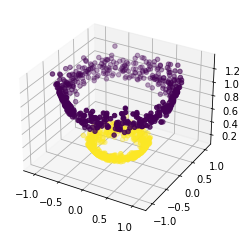

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=Z[:,0],ys=Z[:,1],zs=Z[:,2],c=y)

* Now, we can see a possible plane separating the data
* SVM does all these thing using libraries

### Understanding Kernels
* Kernels are integral part of SVM which is responsible of transforming non-linearly separable data to higher dimension such that they are linearly seprable
* Different types of kernels are supported by SVM
* Every kernel has different way to transforming data into higher dimension
* Linear, Polynomial, RBF, Sigmoid & your own custom kernel

### Kernel trick

Skip all math, the solution of SVM is

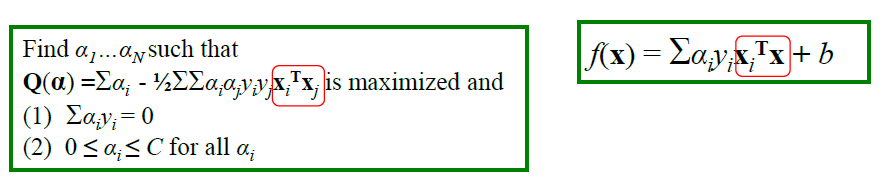

* We noticed that all training points appear only inside inner products
* Each non-zero $α_i$ indicates that corresponding $X_i$ is a support vector.
* The solution relies on an inner product between the test point $X$ and the support vectors $X_i$ 
* Also keep in mind that solving the optimization problem involved computing the inner products $X_i^{T}X_j$ between all training points.

#### So we found that the linear classifier relies on inner product between vectors $K(X_i,X_j)=X_i^TX_j$

* If every datapoint is mapped into high-dimensional space via some transformation $Φ:  X → φ(X)$, the inner product becomes:

$$K(X_i,X_j) = φ(X_i)^Tφ(X_j)$$

* A kernel function is a function that is eqiuvalent to an inner product in some feature space.

### Example: 
	
   2-dimensional vectors $x=[x1   x2]$;  let $K(X_i,X_j)=(1 + X_i^TX_j)^2$,
   
   Need to show that $K(X_i,X_j)= φ(X_i)^Tφ(X_j)$:
	

$K(X_i,X_j)=(1 + X_i^TX_j)^2$

$= 1+ X_{i1}^2X_{j1}^2 + 2 X_{i1}X_{j1}X_{i2}X_{j2}+ X_{i2}^2X_{j2}^2 + 2X_{i1}X_{j1} + 2X_{i2}X_{j2}$

$= [1, X_{i1}^2, √2 X_{i1}X_{i2}, X_{i2}^2, √2X_{i1}, √2X_{i2}]^T [1, X_{j1}^2, √2 X_{j1}X_{j2}, X_{j2}^2, √2X_{j1}, √2X_{j2}] $

$= φ(X_i)^Tφ(X_j)$

where $φ(X) = [1, X_{1}^2, √2 X_{1}X_{2}, X_{2}^2, √2X_{1}, √2X_{2}]$

<b>Thus, a kernel function implicitly maps data to a high-dimensional space (without the need to compute each $φ(X)$ explicitly).</b>

### Examples of Kernel Functions

* Linear: $K(X_i,X_j) = X_i^TX_j  $

    Mapping $Φ:    X  →  φ(X)$, where $φ(X)$ is $X$ itself


* Polynomial of power $p: K(X_i,X_j) = (1+ X_i^TX_j)^p$

    Mapping $Φ:    X  →  φ(X)$, where $φ(X)$ has   ${d+p \choose p} $    dimensions 


* Gaussian (radial-basis function or RBF): $K(X_i,X_j) = e^{-\frac{\|X_i - X_j\|^2}{2\sigma^2}}$

    Mapping $Φ:  X →  φ(X)$, where $φ(X)$ is infinite-dimensional: every point is mapped to a function (a Gaussian); combination of functions for support vectors is the separator.

<b>Higher-dimensional space still has intrinsic dimensionality d, but linear separators in it correspond to non-linear separators in original space.</b>

#### With the kernel trick, the Non-linear SVMs solutions become

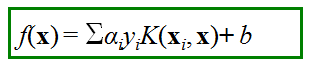

### Examples - Linear Kernels
* Always take simple to complex approach.
* If linear separation is possible between classes, linear kernels would work & not otherwise

### Cancer predictor

In [88]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [89]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [90]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [91]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [92]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [93]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [94]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [95]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [96]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


### Iris Classifier

In [97]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
iris_data = load_iris()

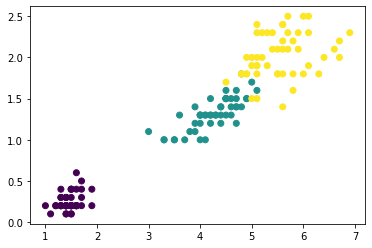

In [99]:
plt.scatter(iris_data.data[:,2], iris_data.data[:,3],c=iris_data.target)

In [100]:
from sklearn.svm import SVC

In [101]:
svc = SVC(kernel='linear')

In [102]:
svc.fit(iris_data.data[:,[2,3]], iris_data.target)

SVC(kernel='linear')

In [103]:
X = iris_data.data[:,[2,3]]

In [104]:
y = iris_data.target

In [105]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [106]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

<ipython-input-107-1988003fb87d>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


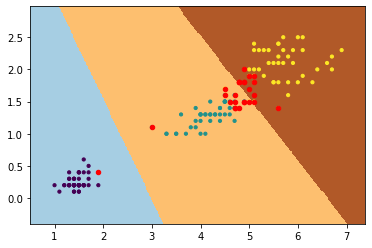

In [107]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

* We can see linear separators

In [108]:
svc.support_vectors_

array([[1.9, 0.4],
       [4.7, 1.4],
       [4.9, 1.5],
       [4.6, 1.5],
       [4.7, 1.6],
       [4.7, 1.4],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.8, 1.4],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.6],
       [4.7, 1.5],
       [3. , 1.1],
       [4.5, 1.7],
       [5. , 1.5],
       [4.9, 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.9],
       [5.1, 1.8]])

### Examples - polynomial and RBF kernel

In [109]:
from sklearn.datasets import make_moons

In [110]:
X,Y = make_moons(n_samples=1000, noise=.05)

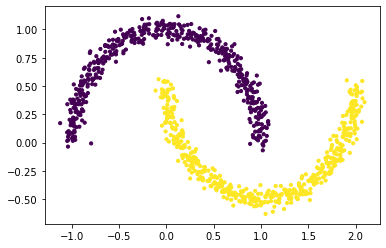

In [111]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [112]:
svc = SVC(kernel='poly')

In [113]:
svc.fit(X,Y)

SVC(kernel='poly')

In [114]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [115]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

<ipython-input-116-b141629686ad>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


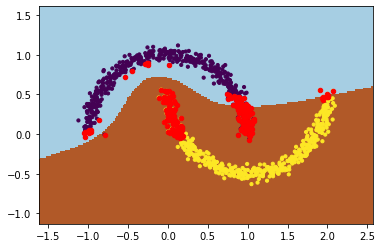

In [116]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

<ipython-input-117-70d92e3d4763>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


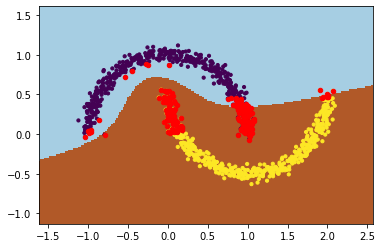

In [117]:
svc = SVC(kernel='poly', C=10)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

#### RBF Kernel
* As we see in the above example, linear or polynomial decision boundery cannot separate classes
* RBF is a kernel trick to transform data non-linearly & then predict the separator

<ipython-input-118-4514abacb3bd>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


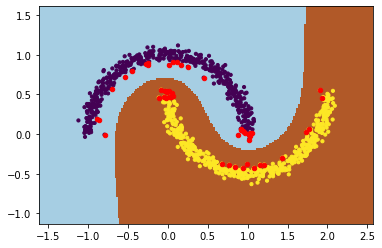

In [118]:
svc = SVC(kernel='rbf')
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

### Understanding Hyper-parameters : C
* The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.
* For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
* A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

In [119]:
X,Y = make_moons(n_samples=100, noise=.3)

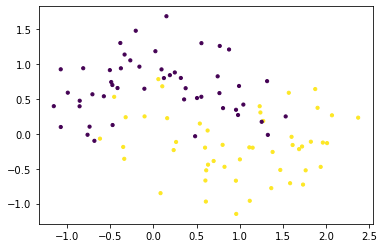

In [120]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [121]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<ipython-input-122-a02186b0bacc>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


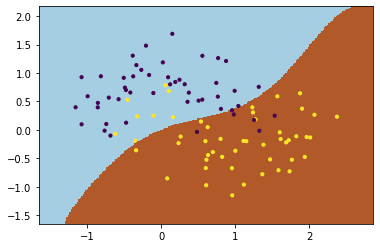

In [122]:
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

<ipython-input-123-d2a4c2ea6714>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


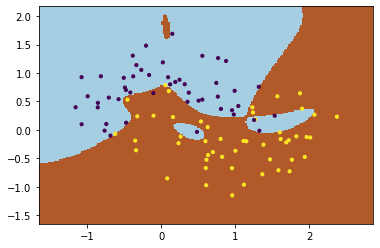

In [123]:
svc = SVC(kernel='rbf', C=100000)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

#### Understanding Hyper-parameter : Gamma
* Gamma is a parameter to handle non-linear classification
* By increasing value of gamma, we are increasing importance of each point

<ipython-input-124-55c8c3db4d54>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


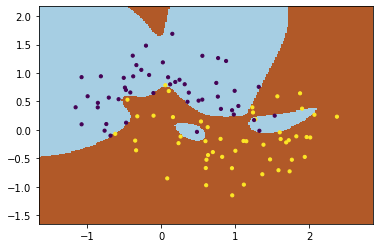

In [124]:
svc = SVC(kernel='rbf', C=100000, gamma=1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

<ipython-input-125-038e91e08c42>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


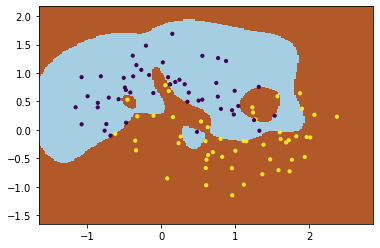

In [125]:
svc = SVC(kernel='rbf', C=100000, gamma=3)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

<ipython-input-126-0defab1a188a>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


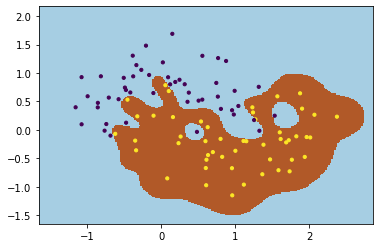

In [126]:
svc = SVC(kernel='rbf', C=100, gamma=17)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

* Using Grid-Search, we need to find right combination of kernel, C & gamma

### SVM for Regression
* Target data is continues in nature
* The relationship between feature data & target can be linear as well as non-linear.
* Based on that the kernel can be chosen - linear, poly or rbf

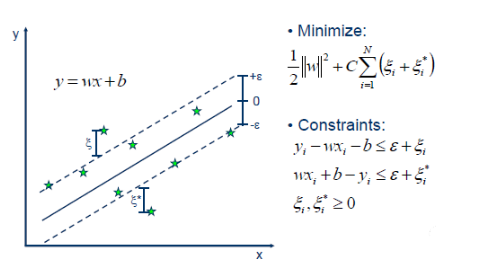

The idea is to find a belt area with width 2ε
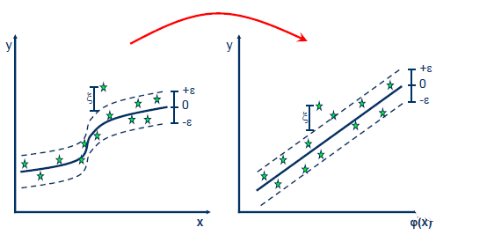

In [127]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

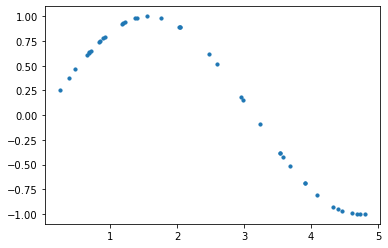

In [128]:
plt.scatter(X, y,s=10)

In [129]:
from sklearn.svm import SVR

In [130]:
svrs = [SVR(kernel='linear', gamma='scale'), SVR(kernel='poly', gamma='scale'), SVR(kernel='rbf', gamma='scale')]

In [131]:
for model in svrs:
    model.fit(X,y)

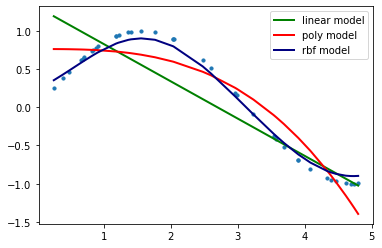

In [132]:
lw = 2
plt.scatter(X, y,s=10)
plt.plot(X, svrs[0].predict(X), color='green', lw=lw, label='linear model')
plt.plot(X, svrs[1].predict(X), color='red', lw=lw, label='poly model')
plt.plot(X, svrs[2].predict(X), color='navy', lw=lw, label='rbf model')
plt.legend()

References

https://en.wikipedia.org/wiki/Support_vector_machine

https://www.saedsayad.com/support_vector_machine.htm

https://scikit-learn.org/stable/modules/svm.html

https://github.com/edyoda/data-science-complete-tutorial/blob/master/14.%20Support%20Vector%20Machines.ipynb

https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

https://dzone.com/articles/using-jsonb-in-postgresql-how-to-effectively-store-1

## Lab exercise - Predict salary

Try to use Decision Tree Classifier to predict salary based on the rest of the features. The data is given in "salary.csv" at https://tinyurl.com/15mfbqce. Visualize the decision tree using graphViz

### Midterm project - Kaggle exercise project

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Goals

* Get familar with Kaggle competition since our final project may be a real Kaggle competition.
* Practice on large data set
* Data quality checking, missing data imputation
* Feature selection. What's your rationals to choose those features.
* Create at least 5 new features and explain your reason for every new features.
* Use feature importance to help you choose 10 features
* Choose 3 ML algorithms we covered in the class to build your prediction models
* For each model you build, you will need to evaluate and show your effort to improve it.
* Your jupyter submission should be in an article quality. Do NOT print huge data set in the notebook. Use head(). Use plotting to visualize your analysis and results. Use markdown to write your comments.
* Your score is based on completeness on every step.
* Submit in HTML and ipynb format on canvas

### Training

* test
* predict

In [133]:
# dkfjajfl

x=10